# Simulating Branching Processes in Python

1. [Probability Distributions](#Section_1)<br>
   1.1 [Use `np.random`](#Section_1.1)<br>
   1.2 [Use `sns.displot` to display the distribution](#Section_1.2)<br>
2. [Simulating discrete-time branching processes](#Section_2)<br>
   2.1 [Simulate the process](#Section_2.1)<br>
   2.2  [Graph the process](#Section_2.2)<br>
   2.3 [Obtain the mean](#Section_2.3)
3. [Calculate the extinction probability with simulations](#Section_3)
4. [Calculate the extinction probability with numerical methods](#Section_4)<br>
   4.1 [Graph $q=f(q)$](#Section_4.1)<br>
   4.2 [Newton-Raphson method](#Section_4.2)<br>
   4.2 [Solve $q=f(q)$ with `fsolve`](#Section_4.3)<br>

<a id='Section_1'></a>
### 1. Probability Distributions

$$p_n = \mathbb{P}(Z_{i,t} = n) \hspace{10mm} n=0,1,2,..$$<br>
$p_n$ is the probability that case $i$ infects $n$ individuals in generation $t$ <br>
$Z$ is the number of secondary cases - $Z_{i,t}$ number of people infected by individual $i$ in generation $t$<br>

As an example we will use the **Poisson distribution**, which is a discrete probability distribution


$$Z \sim Poisson(\lambda)$$<br>
$$\mathbb{P}(Z_{i,t = n}) = \frac{e^{-\lambda}\lambda^n}{n!}$$<br>
Mean = $\lambda$<br>
Variance = $\lambda$<br>
Therefore, for our model $\lambda = R_0$

<a id='Section_1.1'></a>
Probability distributions can be used via `np.random`<br>
To generate random numbers that follow a poisson distribution, we can use:
`np.random.poisson(lam,size)`<br>
`lam` is in our case $R_0$<br>
`size` is the amount of random numbers generated<br>
The output is an array with the numbers generated

In [1]:
#Import numpy 
import numpy as np
#Generate random numbers Poisson distribution
print(np.random.poisson(1.5,1))
print(np.random.poisson(1.5,3))

[0]
[2 1 1]


*Every time we run the code, we get different random numbers*

<a id='Section_1.2'></a>
To visualize the output of random number generators, we will use the library `sns.displot`

In [2]:
#Import matplolib
import matplotlib.pyplot as plt
#Import seaborn
import seaborn as sns

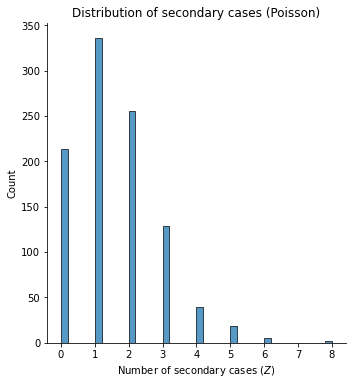

In [3]:
#Generate random numbers Poisson distribution
Ro = 1.5
size = 1000
random_numbers = np.random.poisson(Ro,size)

#Display numbers
sns.displot(random_numbers)
#sns.displot(random_numbers, kind = "kde")

#Aesthetics of the graph
plt.xlabel("Number of secondary cases ($Z$)")
plt.title("Distribution of secondary cases (Poisson)")
plt.show()

<a id='Section_2'></a>
### 2. Simulating discrete-time branching processes
<img src="Fig/BP_2.png" width="500" id='Figure_1'/>
<a href="#Figure_1">Figure 1</a>

To computationally model this process we will use an array:
<img src="Fig/Simu_Array.png" width="700" id='Figure_2'/>
<a href="#Figure_2">Figure 2</a>
<a id='Section_2.1'></a>

In [4]:
#Initial parameters
number_simulations = 100
number_generations = 5
R0 = 1.5

#Initialize information array
array_info = np.zeros((number_simulations, number_generations))
#Verify the shape of the array
# output --> (rows,columns)
print(np.shape(array_info))

(100, 5)


In [5]:
#Fill the array
#Loop that goes over each simulation
for i in range(number_simulations):
    
    #X_0 = 1 for all simulations
    number_info = 1
    array_info[i,0] = number_info
    
    #Loop that goes over each generation
    #Starts in 1, because X_0 is already filled
    for j in range(1,number_generations):
        
        #Z for every individual in X_t-1
        number_secondary_cases = np.random.poisson(R0,number_info)
        #Sum of secondary cases in t to obtain Xt
        number_info = np.sum(number_secondary_cases)
        #Fill the array element
        array_info[i,j]=number_info

The amount of secondary cases caused by each individual ($Z$) is drawn from the same probability distribution, in this example we use the Poisson distribution

<img src="Fig/Algo_Explain.png" width="600" id='Figure_3'/>
<a href="#Figure_3">Figure 3</a>
<a id='Section_2.2'></a>

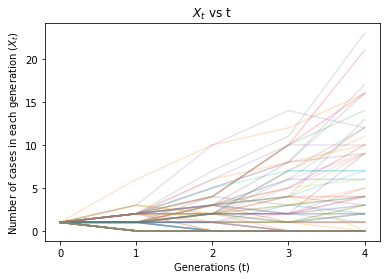

In [6]:
#Plot results (X_t vs t)
#Plot every simulation
for i in range(number_simulations):
    plt.plot(range(number_generations),array_info[i,:],alpha=0.2)
    
#Aesthetics of the graph
plt.title("$X_t$ vs t")
plt.xlabel("Generations (t)")
plt.ylabel("Number of cases in each generation ($X_t$)")
plt.xticks([0,1,2,3,4],["0","1","2","3","4"])
plt.show()

To calculate the mean of $X_t$ for all generations, we will use `np.mean(array,axis)`<br>
`array`is the array for which we want to calculate the mean<br>
`axis=0`calculates the mean by columns<br>
`axis=1`calculates the mean by rows
<a id='Section_2.3'></a>

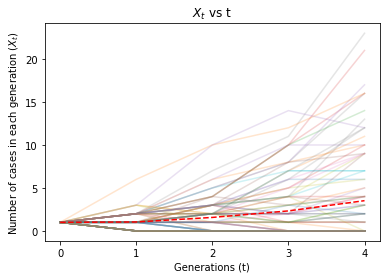

In [7]:
#Calculate the average
mean_info = np.mean(array_info,axis=0)

#Plot results (X_t vs t)
#Plot every simulation
for i in range(number_simulations):
    plt.plot(range(number_generations),array_info[i,:],alpha=0.2)
    
#Plot mean
plt.plot(range(number_generations),mean_info,"r--")
    
#Aesthetics of the graphs
plt.title("$X_t$ vs t")
plt.xlabel("Generations (t)")
plt.ylabel("Number of cases in each generation ($X_t$)")
plt.xticks([0,1,2,3,4],["0","1","2","3","4"])
plt.show()

<a id='Section_3'></a>
### 3. Calculate the extinction probability with simulations

We want to know how many of the total amount of simulations have no individuals infected in $t_{final}$, which in this case is $t=4$

In [8]:
#We use the information contained in the array
#We check how many of the 100 simulations have X_4 = 0

#Count how many simulations become extinct in t_final
Amount_simu_extincted = 0

#Loop over each simulation
for i in range(number_simulations):
    #Take info of last generation
    last_generation = array_info[i,-1]
    
    #Check if it is equal to zero
    if last_generation == 0:
        Amount_simu_extincted = Amount_simu_extincted + 1
        
print(Amount_simu_extincted)

#Probability of extinction
prob_extinction = Amount_simu_extincted/number_simulations
print(prob_extinction)

#Probability of outbreak 
prob_outbreak = 1 - prob_extinction
print(prob_outbreak)

53
0.53
0.47


For the case of $Z \sim Poisson(R_0)$, with $R_0=1.5$, the probability of extinction is $q$. Therefore, the probability of outbreak is $1-q$. For 100 simulations.

<a id='Section_4'></a>
### 4. Calculate the extinction probability with numerical methods

To obtain the extinction probability $q$, we have to solve the equation $q=f(q)$.<br>
$f(s)$ is the probability generating function, which is specific to each probability distribution.<br>
$$f(s)=\sum_{n=0}^\infty p_n s^n$$<br><br>
It is not possible to find an analytical solution of $q=f(q)$ for every distribution, therefore we need to use numerical methods<br>

<a id='Section_4.1'></a>
The first step to solve $q=f(q)$ is to graph $y=q$ and $y=f(q)$. The point(s) where these graphs intersect each other will give us a first approximation of the solution(s) of $q=f(q)$.<br>

For example, for the case of the Poisson distribution (as it was calculated in the homework)
$$f(s) = e^{\lambda(s-1)}$$
Therefore, $$q=f(q) \rightarrow q=e^{\lambda(q-1)}$$
So we need to graph $y=q$ and $y=e^{\lambda(q-1)}$

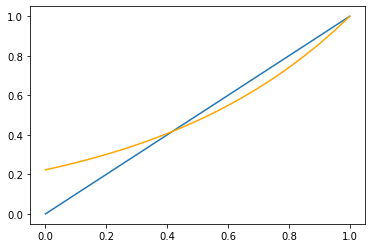

In [9]:
#Define functions
#y=q
def func1(x):
    ans = x
    return ans

#y=f(q)
def func2(Ro,x):
    ans = np.exp(Ro*(x-1))
    return ans

#Define function parameters
#q range (0,1) because q is a prob.extinction
q=np.linspace(0,1)
#Ro
Ro=1.5


#Graph functions
plt.plot(q,func1(q))
plt.plot(q,func2(Ro,q),color="orange")
plt.show()   

At first glance, we can see that there are 2 solutions $q\sim1$ and $q\sim0.4$<br>
To have more accurate solutions q=f(q), we will use `fsolve`from `scipy.optimize`. 
This function is based on the Newton-Raphson method.

<a id='Section_4.2'></a>
### Newton-Raphson Method
Root-finding algorithm which produces successively better approximations to the roots (or zeroes) $f(x)=0$ of a function $y=f(x)$.<br><br>
Steps:
<ol>
<li>Start with an initial guess $x_1$ which is reasonably close to the root.</li>
<li>Take the tangent line to $y=f(x)$ at $x_1$.  </li>
<li>Given that the slope of the tangent line is $m=f'(x_1)$, we can use the <b>formula of the tangent line </b> to calcuate the x-intercept of the tangent line i.e. $x_2$. $x_2$ is a better approximation to the root than $x_1$. (See <a href="#Figure_4">Figure 4</a>)
<li>Use $x_2$ to perform steps 2 and 3.
<li> Repeat steps 2,3 and 4 repeatedly to obtain an accurate approximation to the root. (See <a href="#Figure_5">Figure 5</a>)</li>
</ol>

**Formula of the tangent line**<br>
We can write the equation of the tangent line, given that we have two points in the line $(x_a,y_a)$ and $(x_b,y_b)$<br><br>
$$m=f'(x_a)=\frac{\Delta Y}{\Delta X} = \frac{y_b - y_a}{x_b-x_a}$$<br>
In this case, we have $(x_b,y_b)=(x_2,0)$ and $(x_a,y_a)=(x_1,f(x_1))$. Therefore,<br><br>
$$m=f'(x_1)=\frac{\Delta Y}{\Delta X} = \frac{0 - f(x_1)}{x_2-x_1}$$<br>
$$f'(x_1)=\frac{- f(x_1)}{x_2-x_1}$$<br>

**Calculation $x_2$**<br>
$$x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}$$<br>

**Generalization | Newton-Raphson method**<br>
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$<br>

<img src="Fig/NM_1.png" width="500" id='Figure_4'/>
<a href="#Figure_4">Figure 4</a>

<img src="Fig/NM_2.png" width="550" id='Figure_5'/>
<a href="#Figure_5">Figure 5</a>

<a id='Section_4.3'></a>
### Solve $q=f(q)$

To solve $q=f(q)$ we will find the roots of $0=f(q)-q$.<br>
For this we will use `fsolve` from `scipy.optimize`, such that `fsolve(func,x1)`<br>
`func`in our case is $f(q)-q$<br>
`x1`is the initial guess of the root (obtained from the graphs)<br>
The output is the solution of solving $f(q)=q$ for $q$. This is the probability of extinction $q$.

In [10]:
from scipy.optimize import fsolve

#define the function f(q)-q
def func3(x):
    Ro=1.5
    ans1 = x
    ans2 = np.exp(Ro*(x-1))
    ans = ans2-ans1
    return ans

#Initial guess obtained from the graph
x1=0.4

#Use fsolve to obtain the solution
solution = fsolve(func3,x1)
print(solution)

#Initial guess obtained from the graph
x1=1

#Use fsolve to obtain the solution
solution = fsolve(func3,x1)
print(solution)

[0.41718836]
[1.]


The extinction probability is $q=0.41718836 \rightarrow 41.7\%$ and $q=1$ for a Poisson distribution and $R_0=1.5$